In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.metrics import accuracy_score

In [35]:
df=pd.read_csv("Crop_recommendation.csv")

In [36]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [37]:
df=df.dropna(axis=1)

In [38]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [39]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
X_test = test[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
y_train = train['label']
y_test = test['label']

**Affinity Propagation, Decision Tree Classifier, Voting Classifier, and regularization method (L2 regularization)**

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

filterwarnings("ignore")

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Affinity Propagation for clustering
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(X_train_scaled)

# Get the cluster labels for the training data
train_cluster_labels = affinity_propagation.predict(X_train_scaled)
test_cluster_labels = affinity_propagation.predict(X_test_scaled)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Concatenate the cluster labels with the original features
X_train_with_clusters = np.column_stack((X_train_scaled, train_cluster_labels))
X_test_with_clusters = np.column_stack((X_test_scaled, test_cluster_labels))

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree)
    ],
    voting='hard'
)
voting_classifier.fit(X_train_with_clusters, y_train)

# Regularization using Logistic Regression with L1 or L2 regularization
logistic_regression = LogisticRegression(penalty='l2', random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_voting = voting_classifier.predict(X_test_with_clusters)
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print("Voting Classifier:")
print("Accuracy:", accuracy_voting)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1-score:", f1_voting)

# Evaluate the Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)

from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_voting = voting_classifier.predict(X_test_with_clusters)

# Calculate the overall accuracy
accuracy = accuracy_score(y_test, y_pred_voting)

print("Overall Accuracy:", accuracy)

# Calculate overall precision, recall, and F-score for the ensemble model
overall_precision = precision_score(y_test, y_pred_voting, average='weighted')
overall_recall = recall_score(y_test, y_pred_voting, average='weighted')
overall_f1_score = f1_score(y_test, y_pred_voting, average='weighted')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-score:", overall_f1_score)


Voting Classifier:
Accuracy: 0.9886363636363636
Precision: 0.9889971139971141
Recall: 0.9886363636363636
F1-score: 0.988595068964984
Logistic Regression:
Accuracy: 0.9636363636363636
Precision: 0.9644420567548909
Recall: 0.9636363636363636
F1-score: 0.9635115059268676
Overall Accuracy: 0.9886363636363636
Overall Precision: 0.9889971139971141
Overall Recall: 0.9886363636363636
Overall F1-score: 0.988595068964984


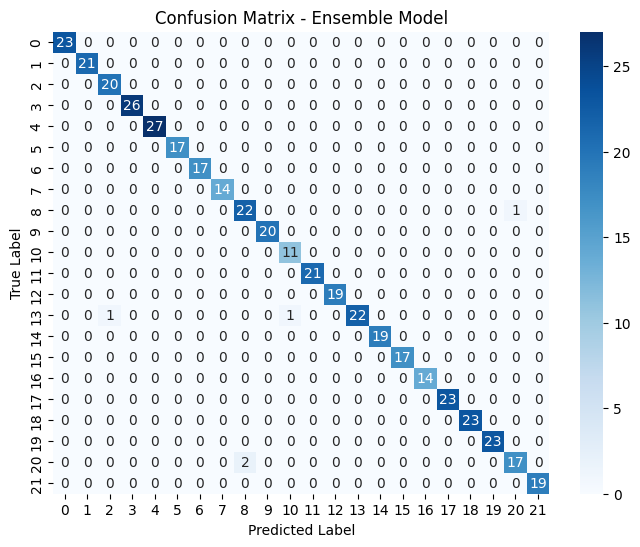

<Figure size 640x480 with 0 Axes>

In [41]:
import seaborn as sns

# Calculate the confusion matrix for the ensemble model
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the classification matrix plot as PNG
plt.savefig('confusion_matrix.png', dpi=300)  # Specify the filename and DPI
plt.show()


In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for one-vs-all ROC curves
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Create a OneVsRestClassifier using the Voting Classifier
ovr_voting_classifier = OneVsRestClassifier(voting_classifier)

# Fit the OneVsRestClassifier
ovr_voting_classifier.fit(X_train_with_clusters, y_train)

# Predict probabilities for each class
y_prob_ensemble = ovr_voting_classifier.predict_proba(X_test_with_clusters)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_ensemble[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # You can add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class classification')
plt.legend(loc="lower right")

# Save the ROC curve plot as PNG
plt.savefig('roc_curve_multiclass.png', dpi=300)  # Specify the filename and DPI
plt.show()


AttributeError: ignored